<h1 style='color:#0B4F6C;font-weight:bold;text-align:center;font-size:3rem;'>Titanic Survival Prediction</h1>

<div>
    <h2 style='color:#0B4F6C;font-weight:bold;font-size:1.5rem;padding:1rem 0;'>Importing Libraries</h2>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

C:\Users\PMLS\AppData\Local\Temp\ipykernel_5928\2789434130.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<div>
    <h2 style='color:#0B4F6C;font-weight:bold;font-size:1.5rem;padding:1rem 0;'>Link to Dataset</h2>
</div>

https://www.kaggle.com/datasets/yasserh/titanic-dataset

<div>
    <h2 style='color:#0B4F6C;font-weight:bold;font-size:1.5rem;padding:1rem 0;'>Importing Data</h2>
</div>

In [2]:
data = pd.read_csv('Titanic-Dataset.csv')

<div>
    <h2 style='color:#0B4F6C;font-weight:bold;font-size:1.5rem;padding:1rem 0;'>This is our Data</h2>
</div>

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div>
    <h2 style='color:#0B4F6C;font-weight:bold;font-size:1.5rem;padding:1rem 0;'>Shape of Data</h2>
</div>

In [4]:
data.shape

(891, 12)

<div style='background-color:#EFE7DA;padding:1rem;margin:3rem 0;'>
    <p style='color:#1e555c;font-weight:400;font-size:1.3rem;display:inline;'>We have 12 columns in our dataset. Keeping our goal in mind, we have to first determine those columns from our data that will be the input for our model. Then we can process on with cleaning the data.</p>
</div>

In [5]:
for col in data.columns:
    print(col)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


<div style='background-color:#EFE7DA;padding:1rem;margin:3rem 0;'>
    <p style='color:#1e555c;font-weight:400;font-size:1.3rem;display:inline;'>'PassengerId' is the unique numeric index given to each row.d</p>
</div>

In [6]:
data['PassengerId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

<div style='background-color:#EFE7DA;padding:1rem;margin:3rem 0;'>
    <p style='color:#1e555c;font-weight:400;font-size:1.3rem;display:inline;'>There are a total of 891 unique values in this column. It is rather useless to includes this column in our set of features.</p>
</div>

<div style='background-color:#EFE7DA;padding:1rem;margin:3rem 0;'>
    <p style='color:#1e555c;font-weight:400;font-size:1.3rem;display:inline;'>As for the second column, the 'Survived' column, it is our label, the output column.</p>
</div>

In [7]:
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

<div style='background-color:#EFE7DA;padding:1rem;margin:3rem 0;'>
    <p style='color:#1e555c;font-weight:400;font-size:1.3rem;display:inline;'>The Pclass .i.e., the Passsenger class representing the three classes of people aboard the Titanic. TO find out whether the said columnm affects the output 'Survived' column, we will go for the correlation.</p>
</div>

In [8]:
data['Pclass'].corr(data['Survived'])

-0.3384810359610148

<div style='background-color:#EFE7DA;padding:1rem;margin:3rem 0;'>
    <p style='color:#1e555c;font-weight:400;font-size:1.3rem;display:inline;'>Weak negative correlation is observed. It is not zero, which means that it causes some effect. However, from knowledge, it can also be said that people aboard with a higher Pclass would have been given priority on people of a lower class. SO we'll include it.</p>
</div>

<div style='background-color:#EFE7DA;padding:1rem;margin:3rem 0;'>
    <p style='color:#1e555c;font-weight:400;font-size:1.3rem;display:inline;'>The 'Name' column will not be included. Whatever the name of the person would have been, it certainly wouldn't have affected a person's survival.</p>
</div>

<div style='background-color:#EFE7DA;padding:1rem;margin:3rem 0;'>
    <p style='color:#1e555c;font-weight:400;font-size:1.3rem;display:inline;'>'Sex/Gender' affects the survival of any person. This is because women and children generally are prioritized in case of a calamity.</p>
</div>

<div style='background-color:#EFE7DA;padding:1rem;margin:3rem 0;'>
    <p style='color:#1e555c;font-weight:400;font-size:1.3rem;display:inline;'>The columns 'Age', 'SibSp' and 'Parch' will be considered because if you are young, the chances of survival increases as you tend to save yourself. Similarly, the number of siblings, spouse, parents and children would affect any person's chances of survival because they would have been too busy trying to save their loved ones, which would decrese their survival rate comparitively to someone who did not have any one aboard.</p>
</div>

<div style='background-color:#EFE7DA;padding:1rem;margin:3rem 0;'>
    <p style='color:#1e555c;font-weight:400;font-size:1.3rem;display:inline;'>'Ticket', 'Cabin' and 'Fare' column would not be included. Whereas, 'Embarked' will be considered.</p>
</div>

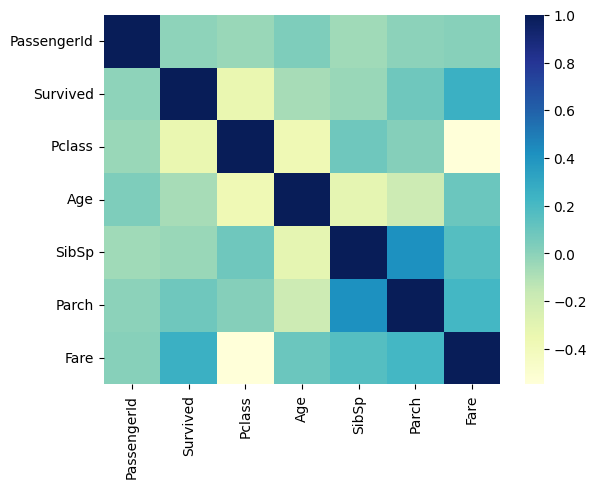

In [9]:
numeric_data = data.select_dtypes(include=[float, int])
sns.heatmap(numeric_data.corr(), cmap='YlGnBu')
plt.show()

<div style='background-color:#EFE7DA;padding:1rem;margin:3rem 0;'>
    <p style='color:#1e555c;font-weight:400;font-size:1.3rem;display:inline;'>You can clearly see the correlation of the numeric columns of the data with the output 'Survived' column.</p>
</div>

<div>
    <h2 style='color:#0B4F6C;font-weight:bold;font-size:1.5rem;padding:1rem 0;'>We will be dropping the unnecessary columns.</h2>
</div>

In [10]:
data = data.drop(columns = ['Cabin', 'PassengerId', 'Name', 'Ticket', 'Fare'], axis = 1)

In [11]:
data.shape

(891, 7)

<div style='background-color:#EFE7DA;padding:1rem;margin:3rem 0;'>
    <p style='color:#1e555c;font-weight:400;font-size:1.3rem;display:inline;'>7 columns are left in our data.</p>
</div>

<div>
    <h2 style='color:#0B4F6C;font-weight:bold;font-size:1.5rem;padding:1rem 0;'>Checking for NULL values</h2>
</div>

In [12]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

<div style='background-color:#EFE7DA;padding:1rem;margin:3rem 0;'>
    <p style='color:#1e555c;font-weight:400;font-size:1.3rem;display:inline;'>The Age and the Embarked column have missing values. Since, we have a limited number of values, instead of dumping them, we will fill the missing Age values with the mean and the Embarked column with the port appearing the most number of times. This leads to less error.</p>
</div>

In [13]:
data['Age'].fillna(data['Age'].mean(), inplace = True)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_5928\3104821419.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace = True)


In [14]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [15]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_5928\2811025160.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)


In [16]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

<div style='background-color:#EFE7DA;padding:1rem;margin:3rem 0;'>
    <p style='color:#1e555c;font-weight:400;font-size:1.3rem;display:inline;'>No nulls.</p>
</div>

<div>
    <h2 style='color:#0B4F6C;font-weight:bold;font-size:1.5rem;padding:1rem 0;'>We have the following distribution of numeric and object columns in data.</h2>
</div>

In [17]:
numeric_columns = data.select_dtypes(include='number').columns.tolist()
object_columns = data.select_dtypes(include='object').columns.tolist()

print("Numeric Columns:", numeric_columns)
print("Object Columns:", object_columns)

Numeric Columns: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch']
Object Columns: ['Sex', 'Embarked']


<div>
    <h2 style='color:#0B4F6C;font-weight:bold;font-size:1.5rem;padding:1rem 0;'>Encoding:</h2>
</div>

In [18]:
data.replace({'Sex': {'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace = True)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_5928\1028869960.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Sex': {'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace = True)


In [19]:
numeric_columns = data.select_dtypes(include='number').columns.tolist()
object_columns = data.select_dtypes(include='object').columns.tolist()

print("Numeric Columns:", numeric_columns)
print("Object Columns:", object_columns)

Numeric Columns: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
Object Columns: []


In [20]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


<div>
    <h2 style='color:#0B4F6C;font-weight:bold;font-size:1.5rem;padding:1rem 0;'>Separating features and label</h2>
</div>

In [21]:
x = data.drop(columns = 'Survived', axis = 1)

In [22]:
y = data['Survived']

In [23]:
x

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,22.000000,1,0,0
1,1,1,38.000000,1,0,1
2,3,1,26.000000,0,0,0
3,1,1,35.000000,1,0,0
4,3,0,35.000000,0,0,0
...,...,...,...,...,...,...
886,2,0,27.000000,0,0,0
887,1,1,19.000000,0,0,0
888,3,1,29.699118,1,2,0
889,1,0,26.000000,0,0,1


In [24]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<div>
    <h2 style='color:#0B4F6C;font-weight:bold;font-size:1.5rem;padding:1rem 0;'>Splitting data into tests and train sets</h2>
</div>

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [26]:
xtrain.shape

(712, 6)

<div>
    <h2 style='color:#0B4F6C;font-weight:bold;font-size:1.5rem;padding:1rem 0;'>Model Development</h2>
</div>

In [27]:
model = LogisticRegression()

In [28]:
model.fit(xtrain, ytrain)

LogisticRegression()

<div>
    <h2 style='color:#0B4F6C;font-weight:bold;font-size:1.5rem;padding:1rem 0;'>Prediction</h2>
</div>

In [30]:
prediction = model.predict(xtest)

<div>
    <h2 style='color:#0B4F6C;font-weight:bold;font-size:1.5rem;padding:1rem 0;'>Model Accuracy</h2>
</div>

In [31]:
print(accuracy_score(prediction, ytest))

0.7877094972067039


In [32]:
prediction = model.predict(xtrain)
print(accuracy_score(prediction, ytrain))

0.8117977528089888


<div>
    <h2 style='color:#0B4F6C;font-weight:bold;font-size:1.5rem;padding:1rem 0;'>Predictive Analysis</h2>
</div>

In [33]:
def predict_survival(pclass, sex, age, sibsp, parch, embarked):
    user_data = {
        'Pclass': [pclass],
        'Sex': [sex],  # 0 for male, 1 for female
        'Age': [age],
        'SibSp': [sibsp],
        'Parch': [parch],
        'Embarked': [embarked]  # 0 for S, 1 for C, 2 for Q
    }
    
    user_df = pd.DataFrame(user_data)
    
    prediction = model.predict(user_df)
    probability = model.predict_proba(user_df)

    if prediction[0] == 1:
        result = "Survived"
    else:
        result = "Not Survived"
    
    return result, probability[0][prediction[0]]

pclass = 1
sex = 0  # 0 for male, 1 for female
age = 55
sibsp = 1
parch = 0
embarked = 0  # 0 for S, 1 for C, 2 for Q

result, probability = predict_survival(pclass, sex, age, sibsp, parch, embarked)
print(f"Prediction: {result}, Probability: {probability}")

Prediction: Not Survived, Probability: 0.8321329469739986
